# UNIFIED MENTOR INTERNSHIP PROJECT

# Foreign Direct Investment 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"C:\Users\Garima Rajput\Downloads\FDI data.csv")

In [3]:
data.head(5)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,22.69,14.14,36.61,8.11,200.38,149.13,169.94,1175.75,959.94,419.88,1098.14,1786.14,1466.23,567.63,359.34,456.31,1440.18
1,MINING,1.32,6.52,10.06,23.48,9.92,7.40,6.62,444.36,34.16,174.40,79.51,142.65,57.89,12.73,684.39,520.67,55.75
2,POWER,89.42,757.44,59.11,27.09,43.37,72.69,157.15,988.68,907.66,1271.79,1271.77,1652.38,535.68,1066.08,707.04,868.80,1112.98
3,NON-CONVENTIONAL ENERGY,0.00,0.00,1.70,4.14,1.27,1.35,2.44,58.82,125.88,622.52,214.40,452.17,1106.52,414.25,615.95,776.51,783.57
4,COAL PRODUCTION,0.00,0.00,0.00,0.04,0.00,9.14,1.30,14.08,0.22,0.00,0.00,0.00,0.00,2.96,0.00,0.00,0.00


In [4]:
data.shape

(63, 18)

In [5]:
data.columns

Index(['Sector', '2000-01', '2001-02', '2002-03', '2003-04', '2004-05',
       '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11',
       '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17'],
      dtype='object')

In [6]:
Year = ['2000-01', '2001-02', '2002-03', '2003-04', '2004-05', '2005-06', '2006-07', '2007-08', '2008-09', '2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17']
Sectors = ['Sector']

In [7]:
#Extracting detailed information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sector   63 non-null     object 
 1   2000-01  63 non-null     float64
 2   2001-02  63 non-null     float64
 3   2002-03  63 non-null     float64
 4   2003-04  63 non-null     float64
 5   2004-05  63 non-null     float64
 6   2005-06  63 non-null     float64
 7   2006-07  63 non-null     float64
 8   2007-08  63 non-null     float64
 9   2008-09  63 non-null     float64
 10  2009-10  63 non-null     float64
 11  2010-11  63 non-null     float64
 12  2011-12  63 non-null     float64
 13  2012-13  63 non-null     float64
 14  2013-14  63 non-null     float64
 15  2014-15  63 non-null     float64
 16  2015-16  63 non-null     float64
 17  2016-17  63 non-null     float64
dtypes: float64(17), object(1)
memory usage: 9.0+ KB


# Data Cleaning

In [8]:
#check for missing value
data.isnull().sum()

Sector     0
2000-01    0
2001-02    0
2002-03    0
2003-04    0
2004-05    0
2005-06    0
2006-07    0
2007-08    0
2008-09    0
2009-10    0
2010-11    0
2011-12    0
2012-13    0
2013-14    0
2014-15    0
2015-16    0
2016-17    0
dtype: int64

In [9]:
#creating average exchange rate list :- Reference (Rbi website)
Rates = [ 45.68, 47.69, 48.39, 45.95, 44.93, 44.27, 45.24, 40.26, 45.99,
         47.44, 45.56, 47.92, 54.40, 60.50, 61.14, 65.46, 67.07]

# Converting American $ to Indian rupees

In [10]:
# creating a function to convert FDI's values from USD to INR
def multiply_columns(df,col_list,num): 
    for col in col_list:
        df[col] = df[col] * Rates[col_list.index(col)]/10
    return df

    

In [11]:
data_InUSD = data.copy()
data_02 = multiply_columns(data, Year, Rates)

In [12]:
#FDI INFLOWS (Amount in rupee crores)
data_02.style.set_caption("FDI INFLOWS (Amount in rupee Crores)").format(precision=2)

,Sector,2000-01,2001-02,2002-03,2003-04,2004-05,2005-06,2006-07,2007-08,2008-09,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17
0,METALLURGICAL INDUSTRIES,103.65,67.43,177.16,37.27,900.31,660.20,768.81,4733.57,4414.76,1991.91,5003.13,8559.18,7976.29,3434.16,2197.00,2987.01,9659.29
1,MINING,6.03,31.09,48.68,107.89,44.57,32.76,29.95,1788.99,157.10,827.35,362.25,683.58,314.92,77.02,4184.36,3408.31,373.92
2,POWER,408.47,3612.23,286.03,124.48,194.86,321.80,710.95,3980.43,4174.33,6033.37,5794.18,7918.20,2914.10,6449.78,4322.84,5687.16,7464.76
3,NON-CONVENTIONAL ENERGY,0.00,0.00,8.23,19.02,5.71,5.98,11.04,236.81,578.92,2953.23,976.81,2166.80,6019.47,2506.21,3765.92,5083.03,5255.40
4,COAL PRODUCTION,0.00,0.00,0.00,0.18,0.00,40.46,5.88,56.69,1.01,0.00,0.00,0.00,0.00,17.91,0.00,0.00,0.00
5,PETROLEUM & NATURAL GAS,42.71,1006.59,274.76,370.54,461.79,53.52,396.80,5656.69,1606.38,1259.67,2535.10,9727.66,1168.51,678.99,6597.13,674.37,1209.94
6,BOILERS AND STEAM GENERATING PLANTS,0.00,0.00,0.00,0.18,2.43,0.00,14.97,6.08,0.00,18.79,2.87,152.34,109.07,1.03,8.13,510.00,361.57
7,PRIME MOVER (OTHER THAN ELECTRICAL GENERATORS),0.00,0.00,0.00,0.00,11.95,3.28,115.68,163.17,344.37,187.39,758.30,1503.49,1004.22,1287.32,1410.50,1041.66,1924.10
8,ELECTRICAL EQUIPMENTS,364.34,313.61,167.96,336.35,437.62,174.87,347.67,2631.96,1919.39,3454.91,701.17,2714.14,1065.53,812.58,3514.51,2912.18,14961.24
9,COMPUTER SOFTWARE & HARDWARE,1043.29,2000.07,1520.61,1692.43,2371.85,6020.59,11822.70,5564.94,7097.82,4136.10,3552.81,3816.11,2643.62,6813.93,14037.99,38649.94,24492.02


# Unpivoting DataFrames from wide to long format:

In [13]:
#unpivoting melt dataframes
melt = pd.melt(data_InUSD, id_vars = Sectors, value_vars = Year, var_name = 'Year', value_name = 'data(US$ Million)', ignore_index=True)
melt

,Sector,Year,data(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,22.69
1,MINING,2000-01,1.32
2,POWER,2000-01,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,53.17
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,105.14


In [14]:
#unpivoting melt01 Dataframe
melt01 = pd.melt(data_02, id_vars = Sectors, value_vars = Year, var_name ='Year', value_name = 'data(rupee Crores)', ignore_index = True)
melt01 = round(melt01,2)
melt01

,Sector,Year,data(rupee Crores)
0,METALLURGICAL INDUSTRIES,2000-01,103.65
1,MINING,2000-01,6.03
2,POWER,2000-01,408.47
3,NON-CONVENTIONAL ENERGY,2000-01,0.00
4,COAL PRODUCTION,2000-01,0.00
...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.61
1067,COIR,2016-17,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12479.92
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.17


In [15]:
#Merging the FDI(US$ million) column of melt Dataframes into melt01 dataframe
Merged = melt01.merge(melt,how = 'left')
Merged

,Sector,Year,data(rupee Crores),data(US$ Million)
0,METALLURGICAL INDUSTRIES,2000-01,103.65,22.69
1,MINING,2000-01,6.03,1.32
2,POWER,2000-01,408.47,89.42
3,NON-CONVENTIONAL ENERGY,2000-01,0.00,0.00
4,COAL PRODUCTION,2000-01,0.00,0.00
...,...,...,...,...
1066,PRINTING OF BOOKS (INCLUDING LITHO PRINTING IN...,2016-17,356.61,53.17
1067,COIR,2016-17,0.00,0.00
1068,CONSTRUCTION (INFRASTRUCTURE) ACTIVITIES,2016-17,12479.92,1860.73
1069,"CONSTRUCTION DEVELOPMENT: Townships, housing, ...",2016-17,705.17,105.14


In [16]:
#sorting the Sectors and year columns
Sorted = Merged.sort_values(['Sector', 'Year'], ignore_index = True)
Sorted

,Sector,Year,data(rupee Crores),data(US$ Million)
0,AGRICULTURAL MACHINERY,2000-01,16.63,3.64
1,AGRICULTURAL MACHINERY,2001-02,4.96,1.04
2,AGRICULTURAL MACHINERY,2002-03,65.23,13.48
3,AGRICULTURAL MACHINERY,2003-04,218.45,47.54
4,AGRICULTURAL MACHINERY,2004-05,0.00,0.00
...,...,...,...,...
1066,VEGETABLE OILS AND VANASPATI,2012-13,589.64,108.39
1067,VEGETABLE OILS AND VANASPATI,2013-14,130.38,21.55
1068,VEGETABLE OILS AND VANASPATI,2014-15,906.95,148.34
1069,VEGETABLE OILS AND VANASPATI,2015-16,224.00,34.22


In [17]:
print("\nstats for Sectors\n",'-'*65, sep='')
print(pd.DataFrame(Sorted.groupby('Sector').describe().loc[:,:]).transpose())


stats for Sectors
-----------------------------------------------------------------
Sector                    AGRICULTURAL MACHINERY  AGRICULTURE SERVICES  \
data(rupee Crores) count               17.000000             17.000000   
                   mean               139.573529            568.894118   
                   std                172.900782           1370.805206   
                   min                  0.000000              2.710000   
                   25%                 13.270000             53.280000   
                   50%                 65.230000            200.010000   
                   75%                218.450000            512.620000   
                   max                519.030000           5798.210000   
data(US$ Million)  count               17.000000             17.000000   
                   mean                26.423529            112.985294   
                   std                 32.712807            289.004756   
                   min     

In [18]:
#Replacing some long values of sector column to short form
Sorted = Sorted[['Sector', 'data(rupee Crores)', 'data(US$ Million)',]].replace(["CONSTRUCTION DEVELOPMENT: Townships, housing, builtup infrastructure and construction-development projects",
                                                                                 "SERVICES SECTOR (Fin., Banking, Insurance, Non Fin/Business, Outsourcing, R&d, Courier, Tech. Testing and Analysis, Other)",
                                                                                 'TEA AND COFFEE (PROCESSING & WAREHOUSING COFFEE & RUBBER)'],
                                                                                ["CONSTRUCTION DEVELOPMENT", "SERVICES SECTOR", "TEA AND COFFEE"])

# Sector wise Total FDI 2000-17:

In [19]:
#grouping by sector column to find Total FDI Inflow per sector from FY2000-01 To FY2016-17
Sectorwise_fdi = Sorted.groupby('Sector').sum()
Sectorwise_fdi.sort_values(by='data(US$ Million)', ascending=False)

,data(rupee Crores),data(US$ Million)
Sector,,
"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)",316347.59,59476.49
COMPUTER SOFTWARE & HARDWARE,137276.82,24669.49
"CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects",115185.97,24293.09
TELECOMMUNICATIONS,130966.04,23946.01
AUTOMOBILE INDUSTRY,92622.66,16673.92
...,...,...
PHOTOGRAPHIC RAW FILM AND PAPER,278.37,67.28
COAL PRODUCTION,122.13,27.74
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",41.61,7.98


# Data visualisation:

<Axes: title={'center': 'SECTOR_WISE FDI INFLOWS'}, xlabel='Sector', ylabel='data(rupee Crores)'>

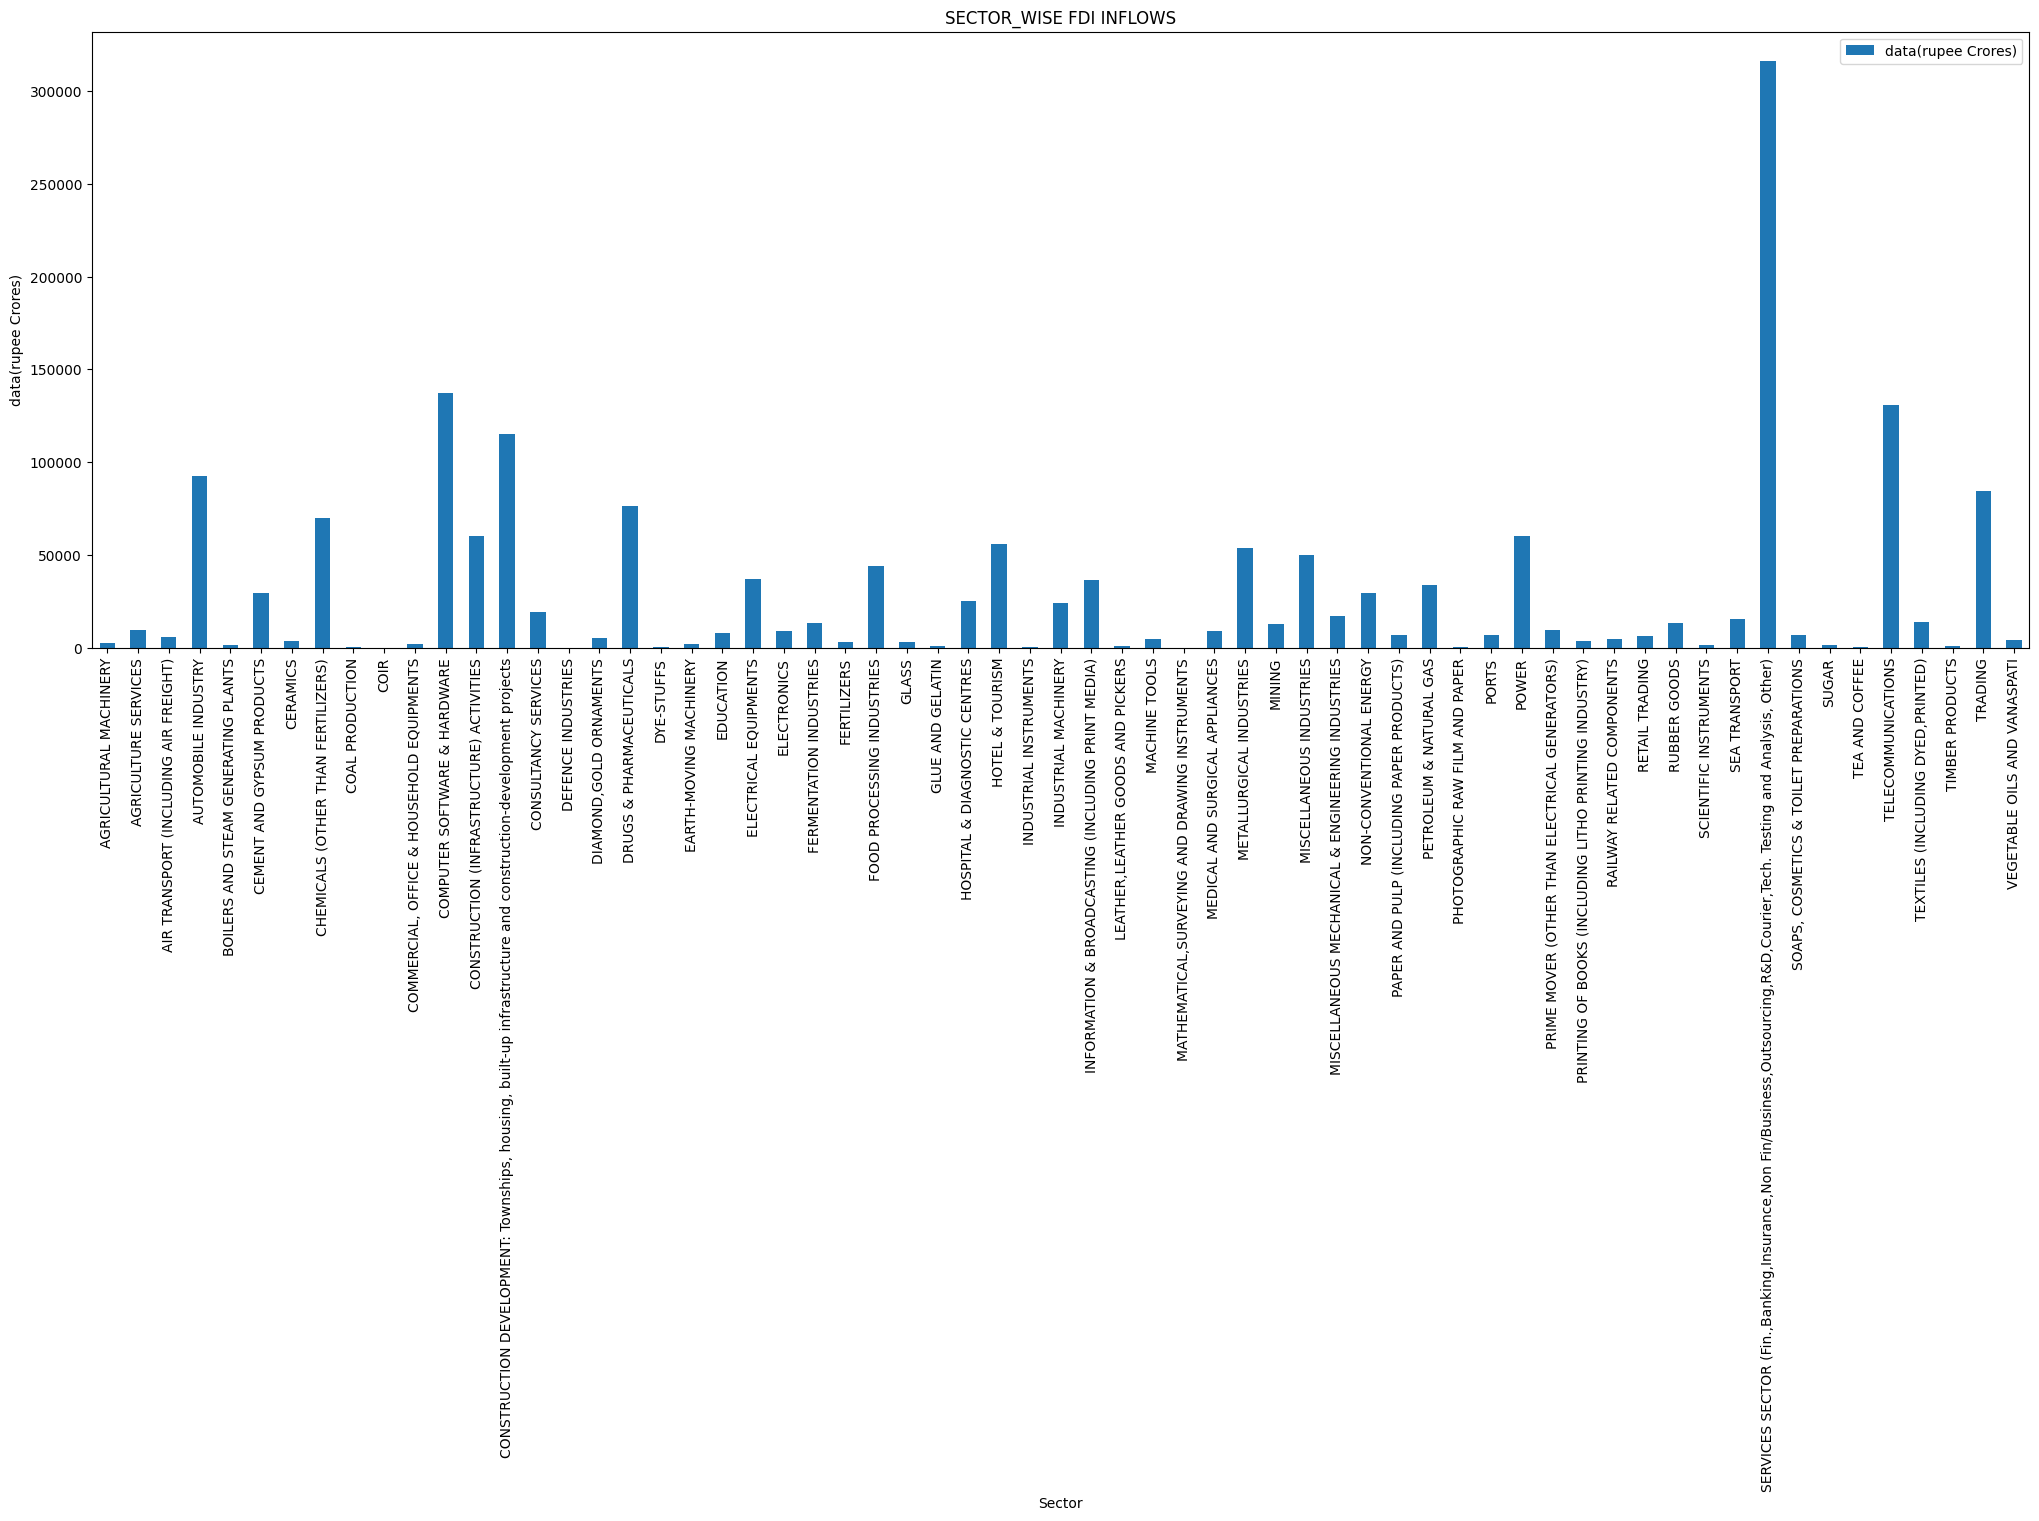

In [20]:
Sectorwise_fdi.plot(kind='bar', y='data(rupee Crores)', figsize = (25,8), legend= True, title = 'SECTOR_WISE FDI INFLOWS',  ylabel='data(rupee Crores)')


<Axes: title={'center': 'SECTOR_WISE FDI INFLOWS'}, xlabel='Sector', ylabel='data(US$ Million)'>

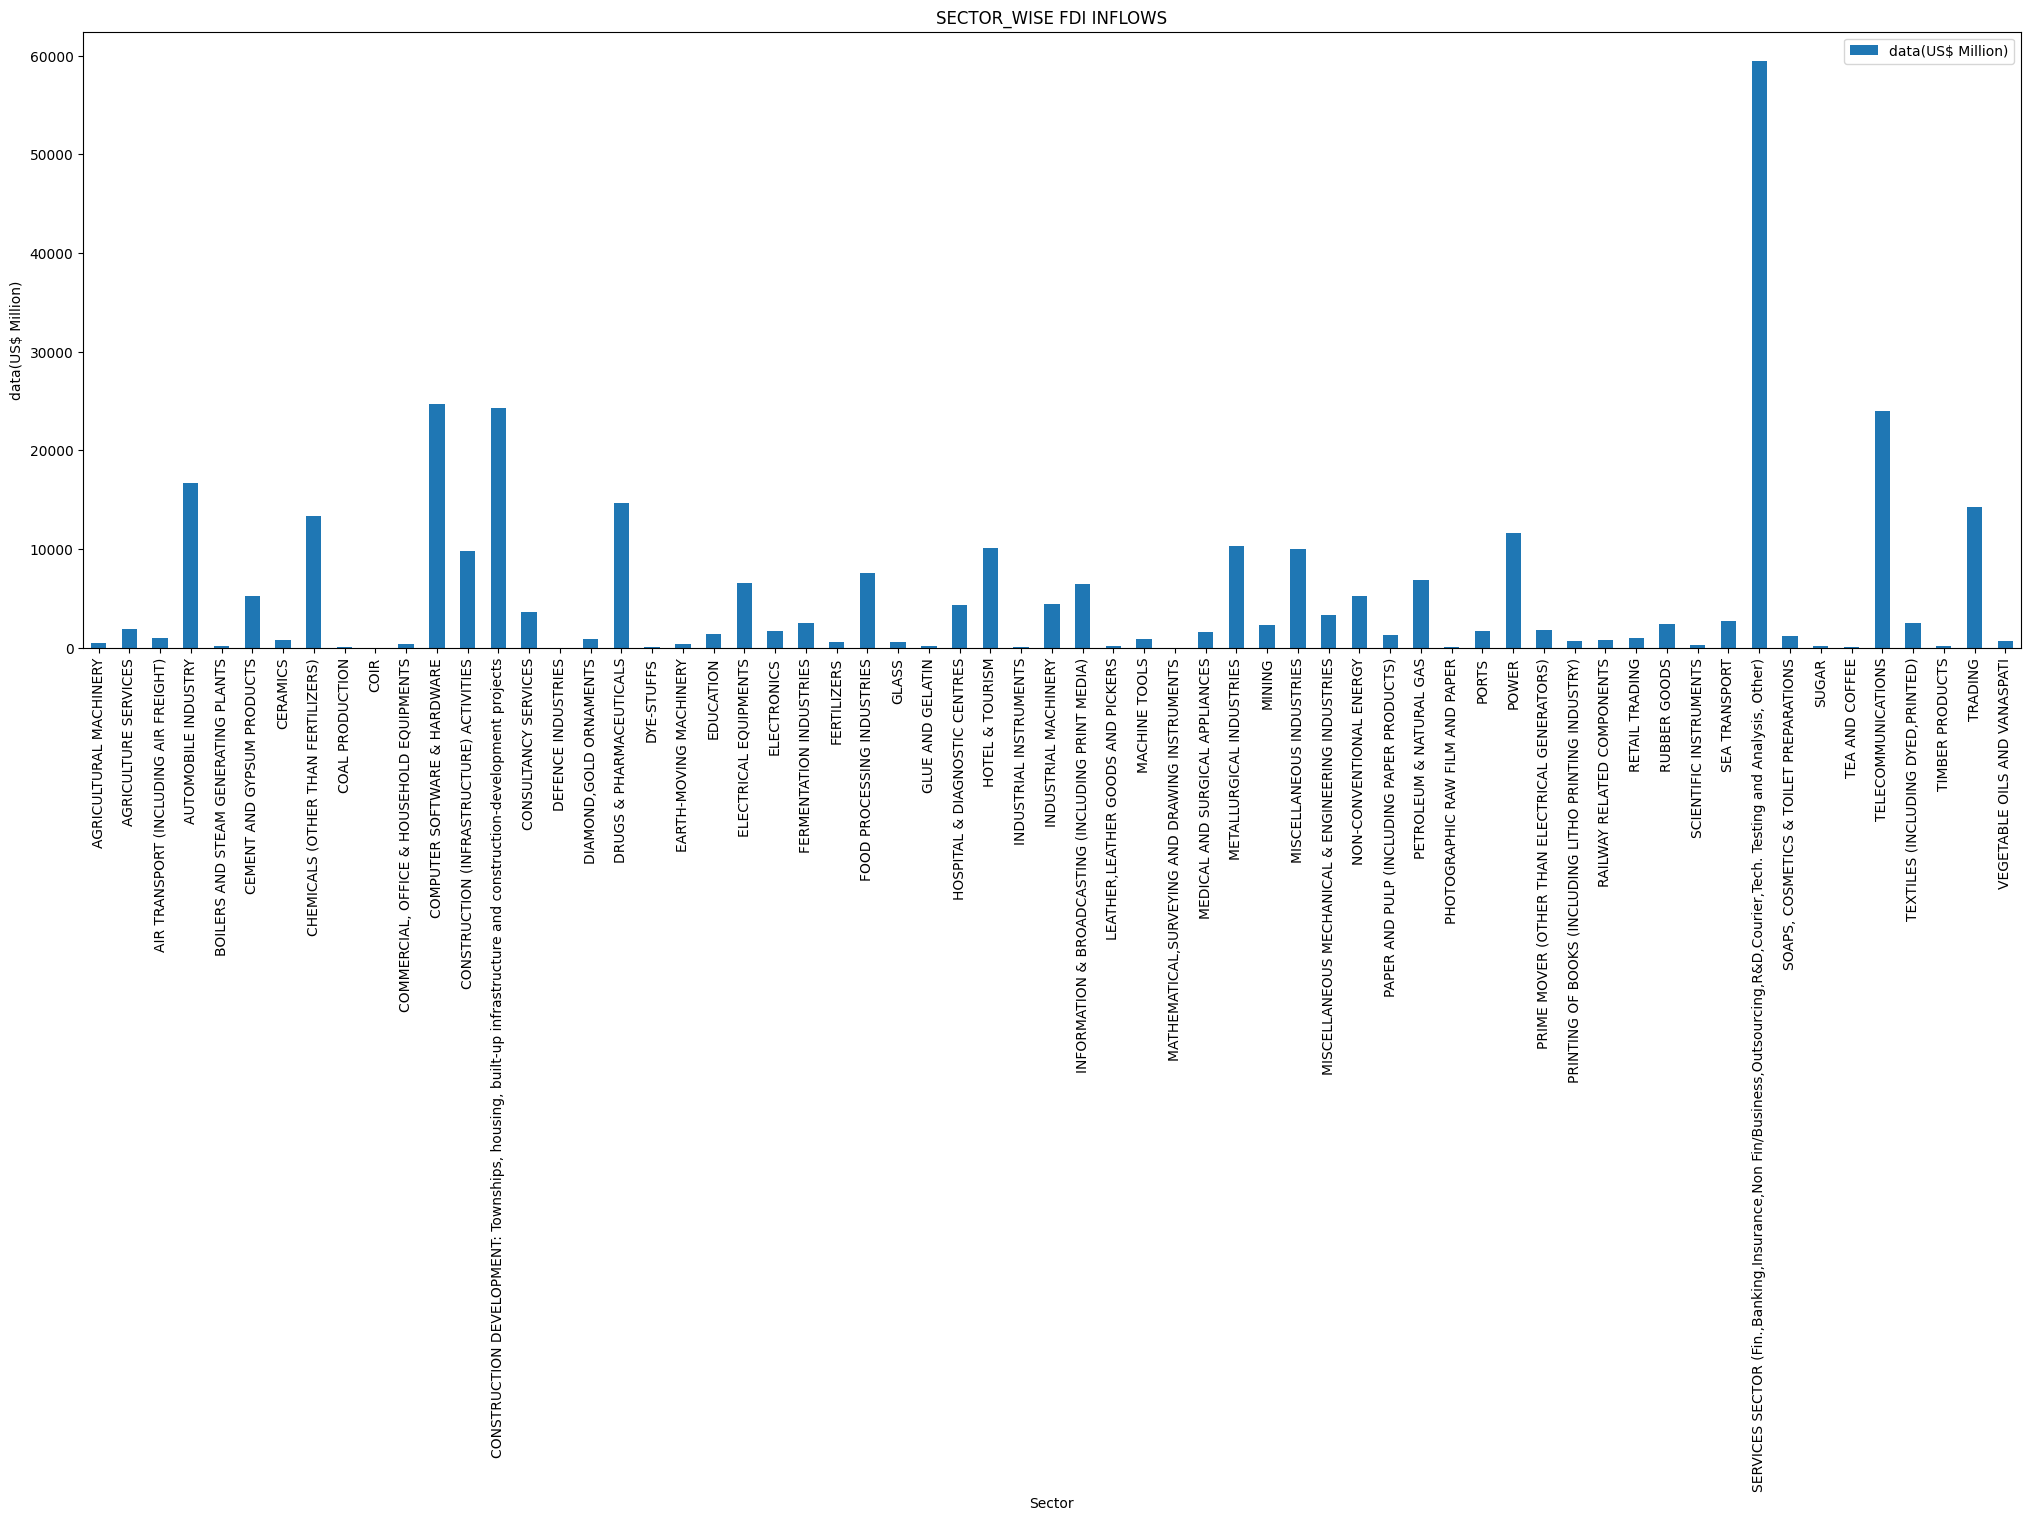

In [21]:
Sectorwise_fdi.plot(kind='bar', y='data(US$ Million)', figsize = (25,8), legend = True, title = 'SECTOR_WISE FDI INFLOWS', ylabel = 'data(US$ Million)')

# Best and worst performing sectors:

# Top 10 SECTORS

In [22]:
#Top 10 and bottom 10 sectors
Top_10_Sectors = Sectorwise_fdi.nlargest(10,['data(rupee Crores)'])

In [23]:
#Calculate percentage wise FDI share among top 10 sectors among all sectors
Total_fdi = round(melt01['data(rupee Crores)'].sum(),2)
Sum = Top_10_Sectors['data(rupee Crores)'].sum()
Top_10_Sectors['In %age'] = round(Top_10_Sectors['data(rupee Crores)']/Sum*100,2)
Top_10_Sectors['%age to Total Inflows'] = round ((Top_10_Sectors['data(rupee Crores)']/Total_fdi)*100,2)
Top_10_Sectors

,data(rupee Crores),data(US$ Million),In %age,%age to Total Inflows
Sector,,,,
"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)",316347.59,59476.49,27.66,17.65
COMPUTER SOFTWARE & HARDWARE,137276.82,24669.49,12.00,7.66
TELECOMMUNICATIONS,130966.04,23946.01,11.45,7.31
"CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects",115185.97,24293.09,10.07,6.43
AUTOMOBILE INDUSTRY,92622.66,16673.92,8.10,5.17
TRADING,84487.83,14210.88,7.39,4.72
DRUGS & PHARMACEUTICALS,76377.64,14706.90,6.68,4.26
CHEMICALS (OTHER THAN FERTILIZERS),70031.18,13293.09,6.12,3.91
POWER,60397.97,11589.13,5.28,3.37


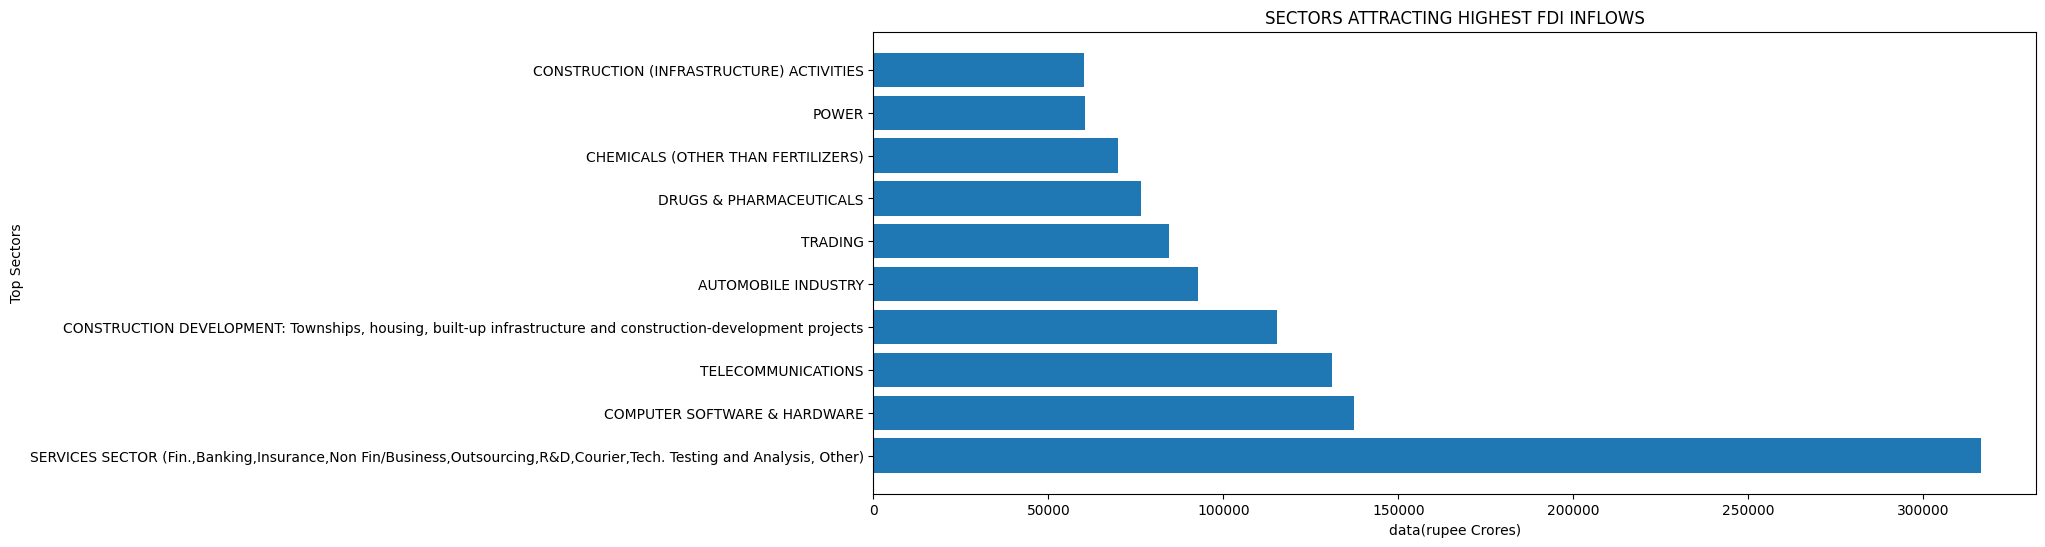

In [24]:
#Creating bar chart to visualise Total FDI inflows in top 10 sectors using Matplotlib

plt.figure(figsize=(15,6))
plt.barh(Top_10_Sectors.index, Top_10_Sectors['data(rupee Crores)'])
plt.title('SECTORS ATTRACTING HIGHEST FDI INFLOWS')
plt.xlabel("data(rupee Crores)")
plt.ylabel("Top Sectors")
plt.show()
          

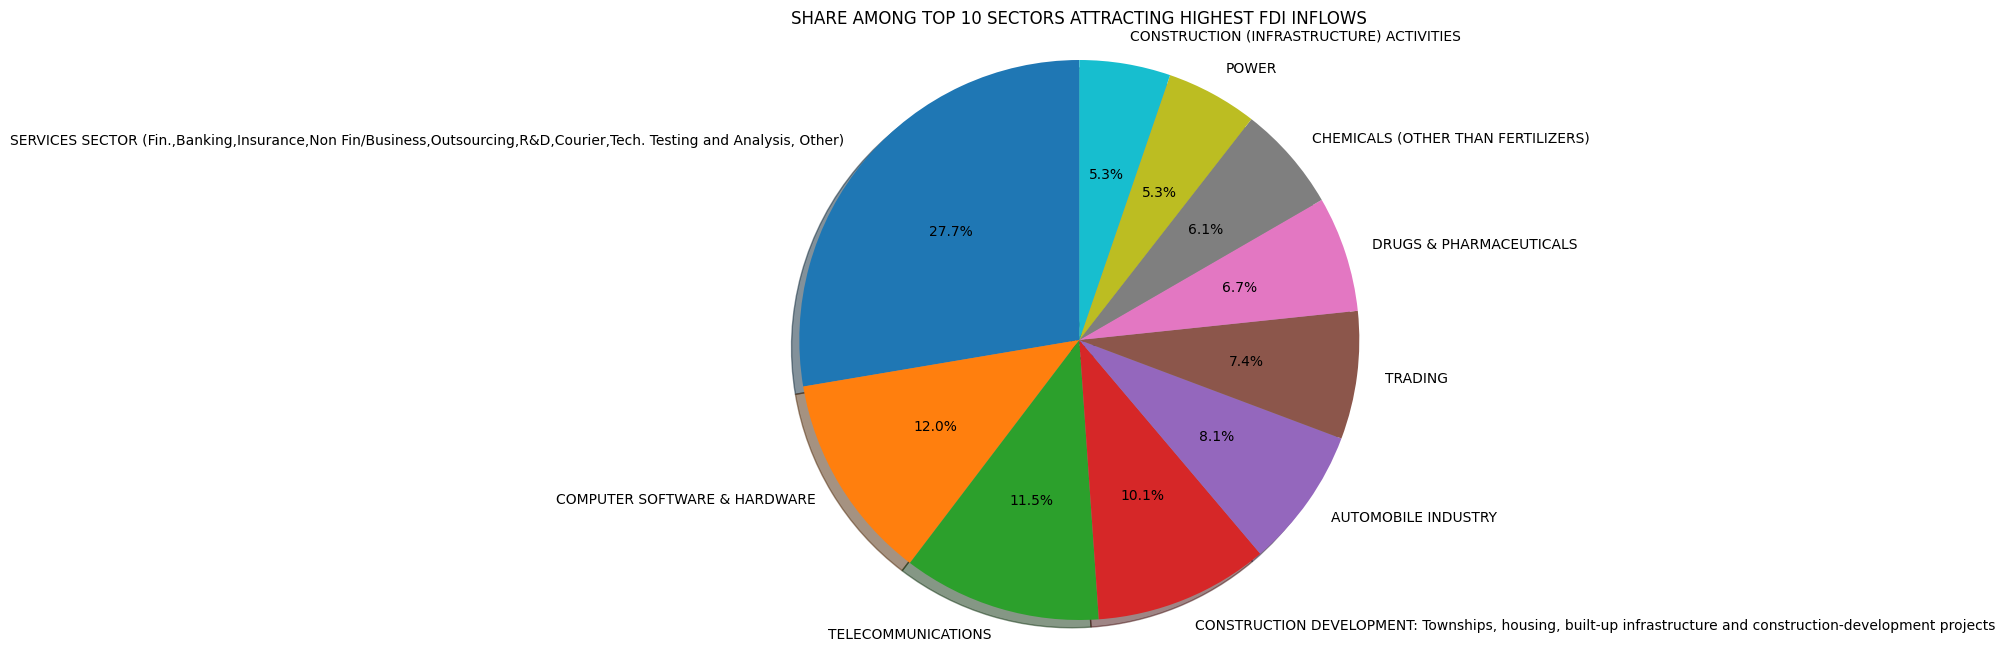

In [25]:
#creating pie chart to visualise percentage share of FDI among top 10 Sectors using Matplotlib
plt.figure(figsize=(20,8))
plt.pie(Top_10_Sectors['data(rupee Crores)'], labels=Top_10_Sectors.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('SHARE AMONG TOP 10 SECTORS ATTRACTING HIGHEST FDI INFLOWS')
plt.show()

From the above chart, we can understand that services sector managed to attract highest FDI which was Rs.316347.59Cr greater than
any other sector and among top 10 sectors it has 27.7% share and among all it has 17.65%.

# BOTTOM 5 SECTORS

In [45]:
#Calculating share among Bottom Sectors and as a whole
Bottom_5_Sectors=Sectorwise_fdi.nsmallest(5,['data(rupee Crores)'])
Sum = Bottom_5_Sectors['data(rupee Crores)'].sum()
Bottom_5_Sectors['In %age']=round(Bottom_5_Sectors['data(rupee Crores)']/Sum*100,2)
Bottom_5_Sectors['%age to Total Inflows']=round((Bottom_5_Sectors['data(rupee Crores)']/Total_fdi)*100,3)
Bottom_5_Sectors

,Year,data(rupee Crores),data(US$ Million),% of Total Inflows,In %age,%age to Total Inflows
Sector,,,,,,
COIR,2000-17,21.64,4.06,0.001208,4.42,0.001
DEFENCE INDUSTRIES,2000-17,26.09,5.12,0.001456,5.33,0.001
"MATHEMATICAL,SURVEYING AND DRAWING INSTRUMENTS",2000-17,41.61,7.98,0.002322,8.49,0.002
COAL PRODUCTION,2000-17,122.13,27.74,0.006816,24.93,0.007
PHOTOGRAPHIC RAW FILM AND PAPER,2000-17,278.37,67.28,0.015535,56.83,0.016


In [37]:
import matplotlib.pyplot as plt

In [ ]:
#Creating bar chart to visualise Total FDI inflow in bottom 5 sectors using Matplotlib
plt.figure(figsize=(12,6))
plt.barh(Bottom_5_Sectors.index,Bottom_5_Sectors['data(rupee Crores)'])
plt.title('SECTORS ATTRACTING LOWEST FDI INFLOWS')
plt.xlabel('data(rupee Crores)')
plt.ylabel('Bottom Sectors')
plt.show()

In [ ]:
#creating pie chart to visualise percentage share of FDI among top 10 sectors 

plt.figure(figsize=(8,5))
plt.pie(Bottom_5_Sectors['data(rupee Crores)'], labels=Bottom_5_Sectors.index,autopct='%1.1f%%', shadow = True, startangle=90)
plt.axis('equal')
plt.title('SHARE AMONG BOTTOM 5 SECTORS ATTRACTING FDI INFLOWS')
plt.show()


# Year wise Details:

In [32]:
#creating Dataframe
melt02 = melt01[['Year', 'data(rupee Crores)']]
melt02 = round(melt02.groupby('Year').sum(),2)

In [33]:
#creating new column of % growth over previous year
melt02['% growth over previous year'] = round(melt02.pct_change()*100,2)

In [34]:
#Year-wise FDI Inflow
print('\n'+"*"*8+"Details on Variation of FDI INFLOW Year-wise"+'*'*8)
melt02.fillna('-')


********Details on Variation of FDI INFLOW Year-wise********


,data(rupee Crores),% growth over previous year
Year,,
2000-01,10865.97,-
2001-02,19208.02,76.77
2002-03,13086.22,-31.87
2003-04,10053.15,-23.18
2004-05,14461.59,43.85
2005-06,24524.51,69.58
2006-07,56512.74,130.43
2007-08,98940.57,75.08
2008-09,144390.03,45.94


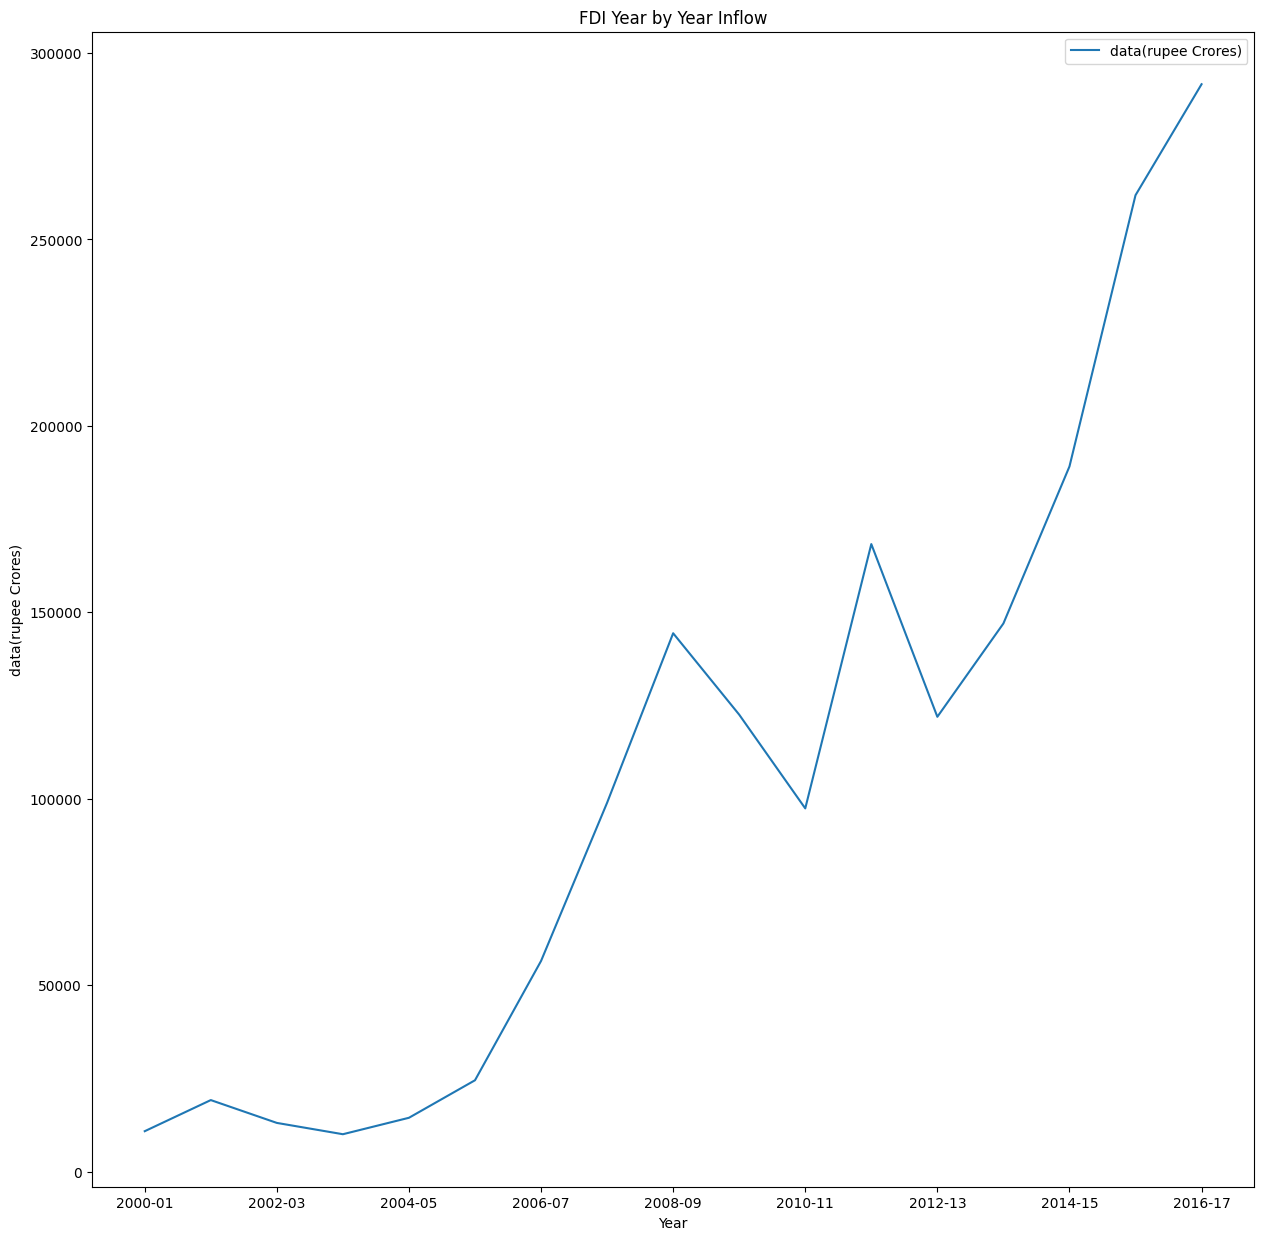

In [35]:
#plotting to show Year by Year FDI Inflow
melt02.plot.line(y='data(rupee Crores)', figsize=(15,15))
plt.ylabel('data(rupee Crores)')
plt.title('FDI Year by Year Inflow')
plt.show()

The above graph show the total amount of FDI inflows in India during the last 17years i.e. 2000-2017.



# Conclusion

In [39]:
#creating a new column with year 2000-17 in sectorwise_fdi Dataframe
Sectorwise_fdi['Year'] = '2000-17'

In [41]:
Sectorwise_fdi = Sectorwise_fdi[['Year', 'data(rupee Crores)', 'data(US$ Million)']]
Sectorwise_fdi[' % of Total Inflows'] = (Sectorwise_fdi['data(rupee Crores)']/ Sectorwise_fdi['data(rupee Crores)'].sum())*100

In [43]:
Sort_val1 = Sectorwise_fdi.sort_values('data(rupee Crores)', ascending=False)
Sort_val = Sort_val1.style.set_caption("SECTOR-WISE FDI INFLOWS").format(precision=3)
Sort_val

,Year,data(rupee Crores),data(US$ Million),% of Total Inflows
Sector,,,,
"SERVICES SECTOR (Fin.,Banking,Insurance,Non Fin/Business,Outsourcing,R&D,Courier,Tech. Testing and Analysis, Other)",2000-17,316347.590,59476.490,17.655
COMPUTER SOFTWARE & HARDWARE,2000-17,137276.820,24669.490,7.661
TELECOMMUNICATIONS,2000-17,130966.040,23946.010,7.309
"CONSTRUCTION DEVELOPMENT: Townships, housing, built-up infrastructure and construction-development projects",2000-17,115185.970,24293.090,6.428
AUTOMOBILE INDUSTRY,2000-17,92622.660,16673.920,5.169
TRADING,2000-17,84487.830,14210.880,4.715
DRUGS & PHARMACEUTICALS,2000-17,76377.640,14706.900,4.262
CHEMICALS (OTHER THAN FERTILIZERS),2000-17,70031.180,13293.090,3.908
POWER,2000-17,60397.970,11589.130,3.371


The Sectoral composition of FDI over the period of april 2000 to june 2017, we can find that the largest recipient of such investment
is service sector (Financial and non-financial services). The share of this sector in FDI flows is 17% of the Inflow total foreign direct investment.

The foreign investors are interested in mainly financial services due its profit genrating advantage. This sector gives scope for the foreign investor to
takes back the profits to the home country. As service sector the services are consumed in the host country and thereby generating outflow of funds from
the host country.

The second recipient is Computer Software and hardware which shares 7% of the total FDI . Telecommunication, Construction Development, automobile
industry, Trade, Drugs and pharmaceuticals, Chemical(Other then Fertilizers), Power, Construction, Hostel and tourism contribute around 7%,6%,5%,4.7%,
4%,4%,3%,3%.

Their is very low interset towards sectors like Coir, Defenece Industries, Mathematical, surveying and drawing Instruments, Coal Production and there are
around 28 to 30 sectors where share is less than or equal to 1%.